# Training simple neural networks on the MNIST dataset using keras

You can create a suitable conda environment to run this notebook using:

    conda create -n keras_demo python=3 tensorflow matplotlib ipykernel scikit-learn pandas
    
If you haven't got the latest cuda drivers, you may also need to specify `cudatoolkit=9.0` or similar.

### First some common imports...

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Set up TensorFlow in a friendly manner

In [2]:
import tensorflow as tf

# if multiple GPUs, only use one of them 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# avoid hogging all the GPU memory
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [3]:
# check that we have the devices we expect available
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5507629784551650354, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10140218164
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 355808756133120134
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"]

### Import keras bits and pieces

In [4]:
# if you have a recent version of tensorflow, keras is included
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

### We will use a standard demonstration data set: MNIST handwritten digits

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_valtest, y_valtest) = mnist.load_data()

In [6]:
# demo the effect of noisy data
#x_train = (x_train/5 + np.random.poisson(200, size=x_train.shape)).clip(0, 255)
#x_valtest = (x_valtest/5 + np.random.poisson(200, size=x_valtest.shape)).clip(0, 255)

In [7]:
# if we wanted to test our model on limited data,
# we could reduce the amount of training data like this...
#idx = np.random.choice(len(x_train), size=len(x_train)//100)
#x_train = x_train[idx]
#y_train = y_train[idx]

If your data isn't split, or want a validation set, need to do split manually

In [8]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.5)

In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
x_test.shape, y_test.shape

((5000, 28, 28), (5000,))

In [11]:
x_val.shape, y_val.shape

((5000, 28, 28), (5000,))

### Take a look at the data

This is a very quick glance - you should carefully examine any new dataset

class = 1


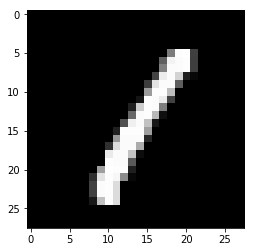

In [12]:
i = 3
plt.imshow(x_train[i], cmap='gray')
print('class =', y_train[i])

### Prepare the data

In [13]:
# convert class vectors to "one-hot" binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
y_train[i]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
def process_data(x):
    x = x.reshape(-1, 784)
    x = x.astype('float32')
    x /= 255
    return x

In [16]:
x_train = process_data(x_train)
x_test = process_data(x_test)
x_val = process_data(x_val)

In [17]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

60000 train samples
5000 test samples
5000 validation samples


## Fully-connected NN

### Construct the network

In [18]:
# a fairly small network for speed
fcmodel = Sequential()
fcmodel.add(Dense(32, activation='relu', input_shape=(784,)))
fcmodel.add(Dense(32, activation='relu'))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [19]:
fcmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [20]:
fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

### Train the network

In [21]:
batch_size = 128
epochs = 50

In [22]:
history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=2,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 4s - loss: 0.4659 - acc: 0.8695 - val_loss: 0.2700 - val_acc: 0.9220
Epoch 2/50
 - 3s - loss: 0.2261 - acc: 0.9342 - val_loss: 0.2040 - val_acc: 0.9366
Epoch 3/50
 - 3s - loss: 0.1788 - acc: 0.9477 - val_loss: 0.1863 - val_acc: 0.9428
Epoch 4/50
 - 3s - loss: 0.1499 - acc: 0.9559 - val_loss: 0.1536 - val_acc: 0.9518
Epoch 5/50
 - 3s - loss: 0.1315 - acc: 0.9612 - val_loss: 0.1427 - val_acc: 0.9566
Epoch 6/50
 - 3s - loss: 0.1178 - acc: 0.9646 - val_loss: 0.1350 - val_acc: 0.9576
Epoch 7/50
 - 3s - loss: 0.1077 - acc: 0.9679 - val_loss: 0.1322 - val_acc: 0.9602
Epoch 8/50
 - 3s - loss: 0.0996 - acc: 0.9706 - val_loss: 0.1243 - val_acc: 0.9620
Epoch 9/50
 - 3s - loss: 0.0929 - acc: 0.9725 - val_loss: 0.1295 - val_acc: 0.9638
Epoch 10/50
 - 3s - loss: 0.0868 - acc: 0.9740 - val_loss: 0.1190 - val_acc: 0.9626
Epoch 11/50
 - 3s - loss: 0.0824 - acc: 0.9753 - val_loss: 0.1221 - val_acc: 0.9630
Epoch 12/50
 - 3s - loss: 0.0769 - a

In [23]:
score = fcmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.17520321746068077
Test accuracy: 0.9658


In [24]:
# really we should not look at the score for this set of data
# until we have finished tuning our model
score = fcmodel.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14310552990114667
Test accuracy: 0.9702


In [25]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss', 'val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['acc', 'val_acc'], ax=ax2)
    max_acc = hist['val_acc'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_acc) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

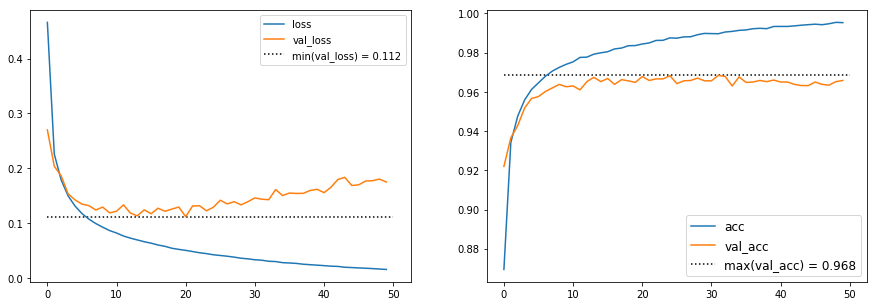

In [26]:
histplot(history)

## Convolutional Neural Network (CNN)

### Reshape the data

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Construct the network

In [28]:
# a fairly small network for speed
cnnmodel = Sequential()
cnnmodel.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnmodel.add(MaxPooling2D((3, 3)))
cnnmodel.add(Conv2D(16, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(num_classes, activation='softmax'))
# could include dropout, regularisation, ...

In [29]:
cnnmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

In [30]:
cnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
_________________________________________________________________


In [31]:
# save weights for reinitialising below
cnnmodel.save_weights('/tmp/cnnmodel_init_weights.tf')


Consider using a TensorFlow optimizer from `tf.train`.


### Train the network

In [32]:
history = cnnmodel.fit(x_train, y_train,
                       batch_size=batch_size, 
                       epochs=2*epochs,
                       verbose=2,
                       validation_data=(x_test, y_test))

Train on 60000 samples, validate on 5000 samples
Epoch 1/100
 - 5s - loss: 0.6546 - acc: 0.8228 - val_loss: 0.2619 - val_acc: 0.9216
Epoch 2/100
 - 4s - loss: 0.2142 - acc: 0.9343 - val_loss: 0.1696 - val_acc: 0.9446
Epoch 3/100
 - 4s - loss: 0.1496 - acc: 0.9548 - val_loss: 0.1206 - val_acc: 0.9596
Epoch 4/100
 - 4s - loss: 0.1214 - acc: 0.9625 - val_loss: 0.1008 - val_acc: 0.9658
Epoch 5/100
 - 4s - loss: 0.1042 - acc: 0.9678 - val_loss: 0.0817 - val_acc: 0.9766
Epoch 6/100
 - 4s - loss: 0.0938 - acc: 0.9711 - val_loss: 0.0706 - val_acc: 0.9782
Epoch 7/100
 - 4s - loss: 0.0857 - acc: 0.9732 - val_loss: 0.0681 - val_acc: 0.9778
Epoch 8/100
 - 4s - loss: 0.0788 - acc: 0.9755 - val_loss: 0.0636 - val_acc: 0.9800
Epoch 9/100
 - 4s - loss: 0.0743 - acc: 0.9766 - val_loss: 0.0575 - val_acc: 0.9808
Epoch 10/100
 - 4s - loss: 0.0705 - acc: 0.9783 - val_loss: 0.0567 - val_acc: 0.9816
Epoch 11/100
 - 4s - loss: 0.0667 - acc: 0.9795 - val_loss: 0.0577 - val_acc: 0.9824
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 98/100
 - 4s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0513 - val_acc: 0.9844
Epoch 99/100
 - 3s - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0538 - val_acc: 0.9840
Epoch 100/100
 - 4s - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0489 - val_acc: 0.9862


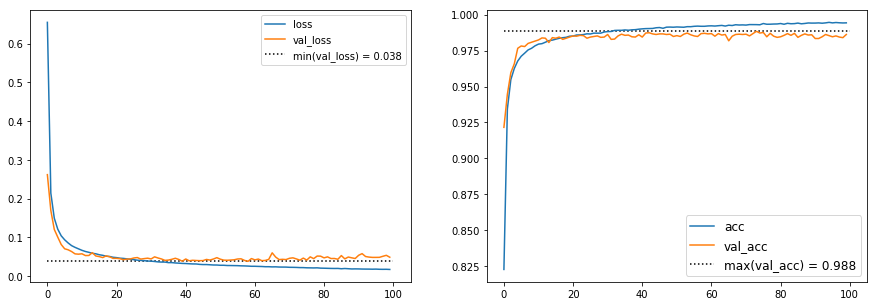

In [33]:
histplot(history)

Data augmentation reduced number of misclassifications by half.